# Hyperparameters influance

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import os.path

## Load model results



In [2]:
results = np.load('results.npy', allow_pickle=True)

In [3]:
data = []
for index, row in results.iterrows():
    values = []
    for key, value in row['params'].items():
        values.append(value)
    values.append(row['mean_test_score'])  
    data.append(values)

In [4]:
col_names = list(results['params'].values[0].keys())
col_names.append('mean_test_score')

In [5]:
df = pd.DataFrame(data, columns=col_names)

In [6]:
df.head()

,subsample,n_estimators,min_child_weight,max_depth,learning_rate,lambda,colsample_bytree,colsample_bylevel,booster,alpha,mean_test_score
0,0.810526,730,2.151381,15,0.004202,26.664384,0.737105,0.001000,gbtree,0.037503,0.835130
1,0.289474,280,27.655101,7,0.077793,0.694326,1.000000,0.737105,gbtree,6.197039,0.859300
2,0.668421,680,76.806574,4,0.482088,6.197039,1.000000,1.000000,gbtree,6.197039,0.830569
3,0.431579,730,21.422466,10,0.006052,114.730508,0.684526,0.842263,gbtree,114.730508,0.817475
4,0.147368,180,99.152617,13,0.008716,0.018080,0.474211,0.106158,gbtree,0.334726,0.787429


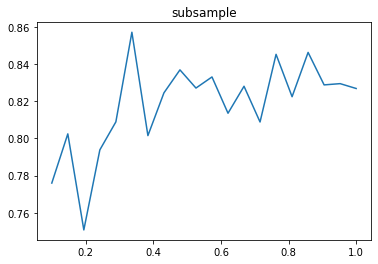

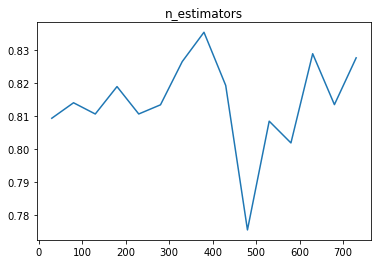

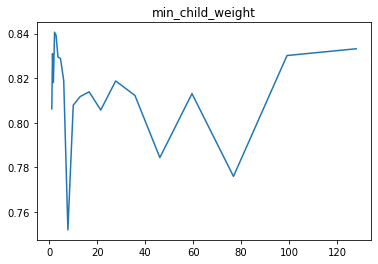

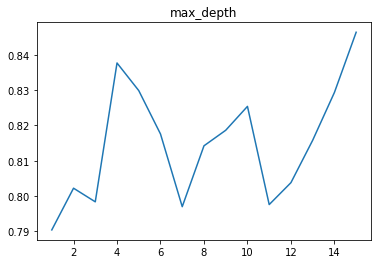

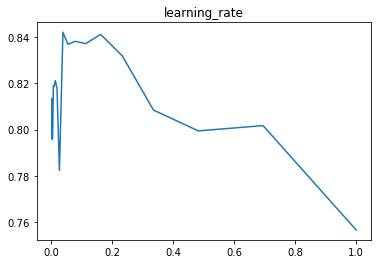

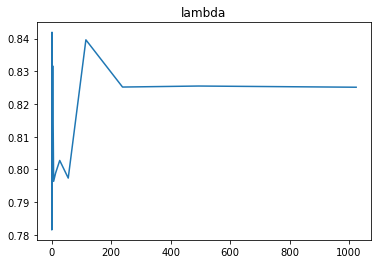

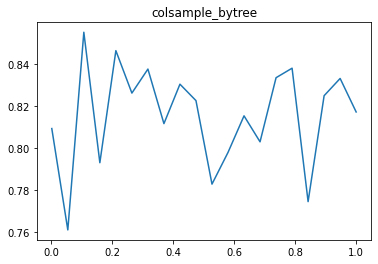

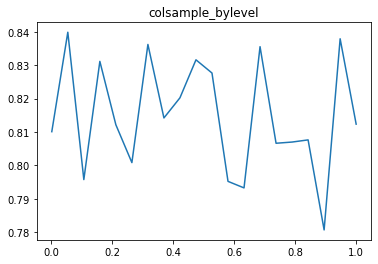

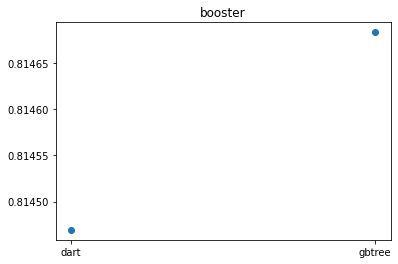

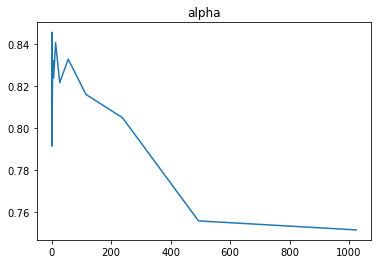

In [7]:
for column in df.loc[:, df.columns != 'mean_test_score']:
    grouped_df = df[[column, 'mean_test_score']].groupby(as_index=False, by=[column]).mean()

    if column == 'booster':
        plt.scatter(grouped_df[column],grouped_df['mean_test_score'])

    else:
        plt.figure()
        plt.plot(grouped_df[column],grouped_df['mean_test_score'])
  
    plt.title(column)
    plt.show()


### Obserwacje:
* Wybór boostera miał mały wpływ na wynik modelowania.
* Zwiększając parametr alpha, wynik modelowania spadał. Podobnie, w przypadku parametru lambda - od pewnego momentu zwiększanie parametru nie przynosiło już żadnych zmian
* Parametr learning rate wraz ze wzrostem powodował spadek wyniku modelu.
* Liczba estymatorów ma wyraźne maksimum, jednak żaden z modeli o liczbie estymatorów z tego maksimum nie był modelem, należącym do pierwszej trójki (i omówionym w poprzednim notebooku).
* Maksymalna głębokość ma trzy maksima. Wśród pierwszej trójki najlepszych modeli znalazł się jeden ze środkowego maksimum i dwa z maksimum na końcu przedziału po prawej stronie. W dalszej pracy można spróbować zwiększać głębokość drzewa, ponieważ wygląda na to, że krzywa może mieć tendencję wzrostową.